<a href="https://colab.research.google.com/github/souvagya0802/EXAM/blob/main/SOFT_COMPUTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
numbers = [1, 2, 3, 4, 5]
if 3 in numbers:
    print('3 is in the list')
else:
    print('3 is not in the list')
if 6 not in numbers:
    print('6 is not in the list')
else:
    print('6 is in the list')
string = 'Hello, world!'
if 'world' in string:
    print('Substring "world" is in the string')
else:
    print('Substring "world" is not in the string')
if 'Python' not in string:
    print('Substring "Python" is not in the string')
else:
    print('Substring "Python" is in the string')

3 is in the list
6 is not in the list
Substring "world" is in the string
Substring "Python" is not in the string


In [ ]:

list1 = [1, 2, 3]
list2 = [1, 2, 3]
if list1 is list2:
    print('list1 and list2 have the same identity')
else:
    print('list1 and list2 do not have the same identity')
if list1 is not list2:
    print('list1 and list2 do not have the same identity')
else:
    print('list1 and list2 have the same identity')
x = 10
y = 10
if x is y:
    print('x and y have the same identity')
else:
    print('x and y do not have the same identity')
if x is not y:
    print('x and y do not have the same identity')
else:
    print('x and y have the same identity')

list1 and list2 do not have the same identity
list1 and list2 do not have the same identity
x and y have the same identity
x and y have the same identity


In [ ]:
 pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=b9701ebde824fd2225afa435b887c4c37e38abd574cdb74a8254f8fd982f980b
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


AssertionError: ignored

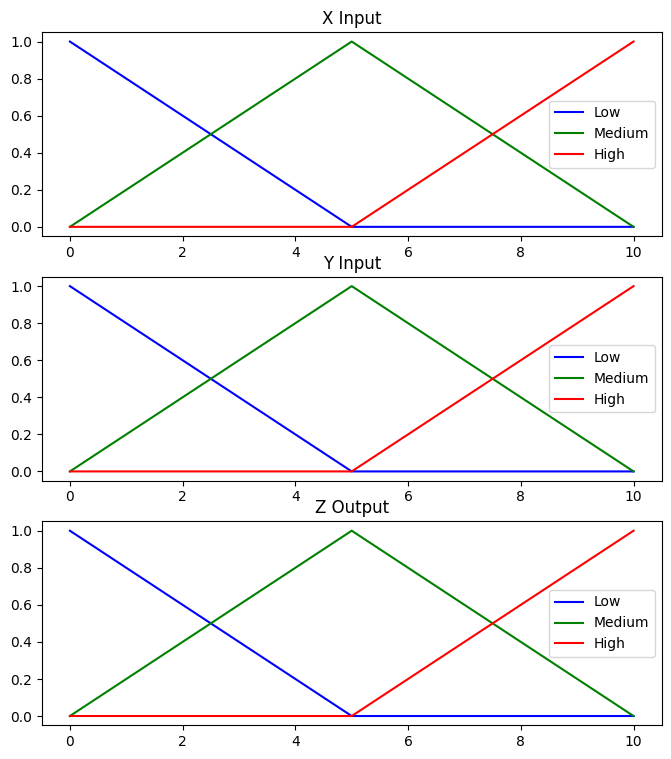

In [ ]:
import numpy as np
import skfuzzy as fuzz

x_range = np.arange(0, 11, 1)
y_range = np.arange(0, 11, 1)
z_range = np.arange(0, 11, 1)

x_lo = fuzz.trimf(x_range, [0, 0, 5])
x_md = fuzz.trimf(x_range, [0, 5, 10])
x_hi = fuzz.trimf(x_range, [5, 10, 10])

y_lo = fuzz.trimf(y_range, [0, 0, 5])
y_md = fuzz.trimf(y_range, [0, 5, 10])
y_hi = fuzz.trimf(y_range, [5, 10, 10])

z_lo = fuzz.trimf(z_range, [0, 0, 5])
z_md = fuzz.trimf(z_range, [0, 5, 10])
z_hi = fuzz.trimf(z_range, [5, 10, 10])

import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_range, x_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_range, x_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_range, x_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('X Input')
ax0.legend()

ax1.plot(y_range, y_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(y_range, y_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(y_range, y_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Y Input')
ax1.legend()

ax2.plot(z_range, z_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(z_range, z_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(z_range, z_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Z Output')
ax2.legend()

x_value = 7
y_value = 3

x_lo_degree = fuzz.interp_membership(x_range, x_lo, x_value)
x_md_degree = fuzz.interp_membership(x_range, x_md, x_value)
x_hi_degree = fuzz.interp_membership(x_range, x_hi, x_value)

y_lo_degree = fuzz.interp_membership(y_range, y_lo, y_value)
y_md_degree = fuzz.interp_membership(y_range, y_md, y_value)
y_hi_degree = fuzz.interp_membership(y_range, y_hi, y_value)

z_lo_degree = np.fmin(x_hi_degree, y_lo_degree)
z_md_degree = np.fmin(x_md_degree, y_md_degree)
z_hi_degree = np.fmin(x_lo_degree, y_hi_degree)

aggregated = np.fmax(z_lo_degree, np.fmax(z_md_degree, z_hi_degree))

z_value = fuzz.defuzz(z_range, aggregated, 'centroid')

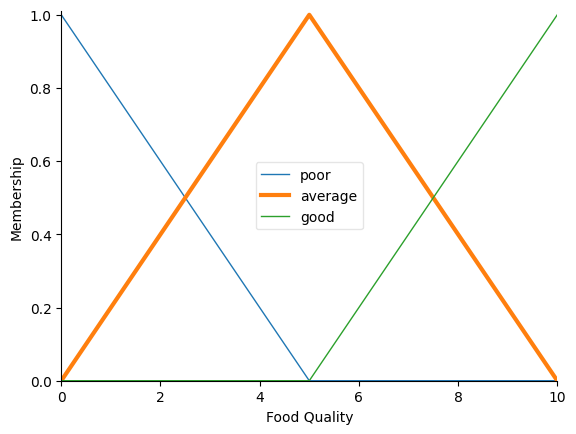

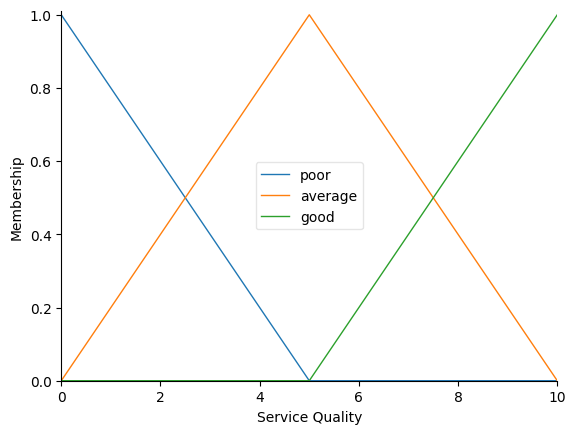

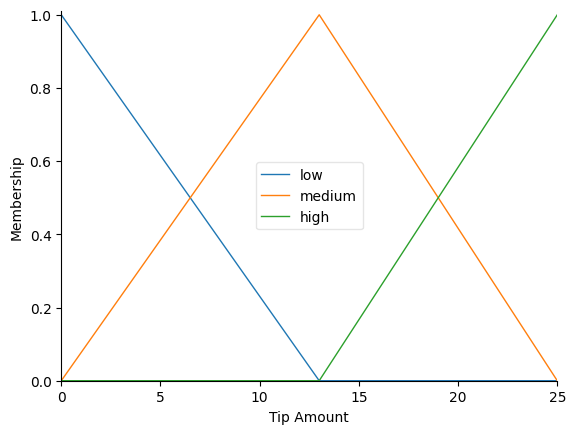

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'Food Quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'Service Quality')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'Tip Amount')

quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality['average'].view()
service.view()
tip.view()

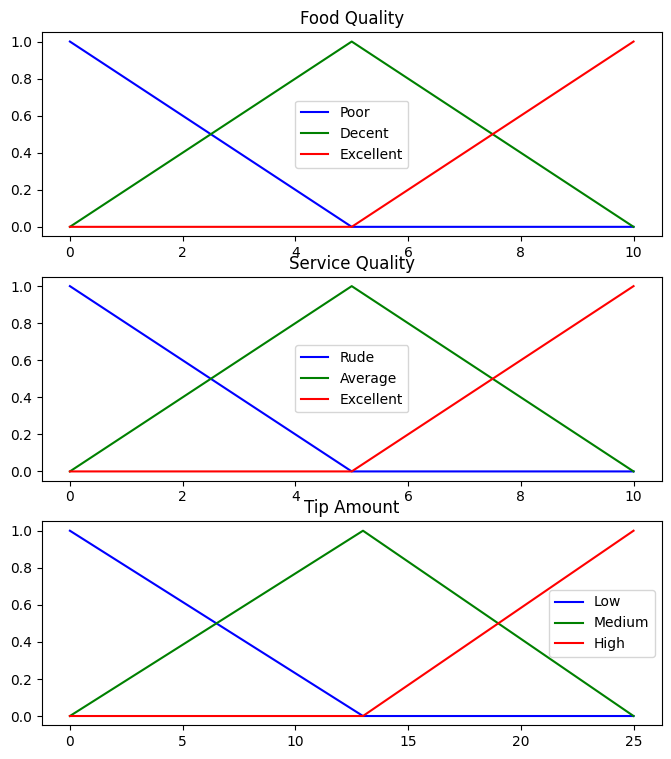

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Define input and output ranges
food_quality_range = np.arange(0, 11, 1)
service_quality_range = np.arange(0, 11, 1)
tip_range = np.arange(0, 26, 1)

# Define input fuzzy sets
poor = fuzz.trimf(food_quality_range, [0, 0, 5])
decent = fuzz.trimf(food_quality_range, [0, 5, 10])
excellent = fuzz.trimf(food_quality_range, [5, 10, 10])

rude = fuzz.trimf(service_quality_range, [0, 0, 5])
average = fuzz.trimf(service_quality_range, [0, 5, 10])
excellent_service = fuzz.trimf(service_quality_range, [5, 10, 10])

# Define output fuzzy set
low_tip = fuzz.trimf(tip_range, [0, 0, 13])
medium_tip = fuzz.trimf(tip_range, [0, 13, 25])
high_tip = fuzz.trimf(tip_range, [13, 25, 25])

# Visualize fuzzy sets
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(food_quality_range, poor, 'b', linewidth=1.5, label='Poor')
ax0.plot(food_quality_range, decent, 'g', linewidth=1.5, label='Decent')
ax0.plot(food_quality_range, excellent, 'r', linewidth=1.5, label='Excellent')
ax0.set_title('Food Quality')
ax0.legend()

ax1.plot(service_quality_range, rude, 'b', linewidth=1.5, label='Rude')
ax1.plot(service_quality_range, average, 'g', linewidth=1.5, label='Average')
ax1.plot(service_quality_range, excellent_service, 'r', linewidth=1.5, label='Excellent')
ax1.set_title('Service Quality')
ax1.legend()

ax2.plot(tip_range, low_tip, 'b', linewidth=1.5, label='Low')
ax2.plot(tip_range, medium_tip, 'g', linewidth=1.5, label='Medium')
ax2.plot(tip_range, high_tip, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip Amount')
ax2.legend()

# Apply fuzzy logic to find tip amount
food_quality = 8
service_quality = 3

# Apply fuzzy sets to input values
poor_degree = fuzz.interp_membership(food_quality_range, poor, food_quality)
decent_degree = fuzz.interp_membership(food_quality_range, decent, food_quality)
excellent_degree = fuzz.interp_membership(food_quality_range, excellent, food_quality)

rude_degree = fuzz.interp_membership(service_quality_range, rude, service_quality)
average_degree = fuzz.interp_membership(service_quality_range, average, service_quality)
excellent_service_degree = fuzz.interp_membership(service_quality_range, excellent_service, service_quality)

# Apply fuzzy logic to output set
low_tip_degree = np.fmin(poor_degree, rude_degree)
medium_tip_degree = np.fmin(decent_degree, average_degree)
high_tip_degree = np.fmin(excellent_degree, excellent_service_degree)

# Aggregate the results
aggregated = np.fmax(low_tip_degree, np.fmax(medium_tip_degree, high_tip_degree))

In [ ]:
import tensorflow as tf

x_train = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]], dtype=tf.float32)
y_train = tf.constant([[2.0], [4.0], [6.0]], dtype=tf.float32)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[3])
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)
x_test = tf.constant([[10.0, 11.0, 12.0]], dtype=tf.float32)
y_test = model.predict(x_test)
print('Prediction:', y_test)

Epoch 1/100
1/1 [==============================] - 1s 615ms/step - loss: 10.3228
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 2.1094
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0271
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.8440
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 3.6234
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 3.5456
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 2.2281
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8002
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1775
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8389
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 1.4347
Epoch 13/100
1/1 [==============================] - 0s

In [ ]:
import numpy as np

x = np.array([[0.2, 0.3, 0.4], [0.5, 0.6, 0.7]])
w = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
b = np.array([0.7, 0.8])

def binary_sigmoid(x):
    return 1 / (1 + np.exp(-x))
def bipolar_sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1
z = np.dot(x, w) + b
y_binary = binary_sigmoid(z)
print('Output using binary sigmoidal activation function:\n', y_binary)
y_bipolar = bipolar_sigmoid(z)
print('Output using bipolar sigmoidal activation function:\n', y_bipolar)

Output using binary sigmoidal activation function:
 [[0.73302015 0.76852478]
 [0.78244978 0.82635335]]
Output using bipolar sigmoidal activation function:
 [[0.4660403  0.53704957]
 [0.56489955 0.65270671]]


In [ ]:
class McCullochPittsNeuron:
    def _init_(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold
    def activate(self, inputs):
        weighted_sum = sum([inputs[i] * self.weights[i] for i in range(len(inputs))])
        return 1 if weighted_sum >= self.threshold else 0
def AND(x1, x2):
    neuron = McCullochPittsNeuron([1, 1], 2)
    y = neuron.activate([x1, x2])
    return y
print("Using AND Function")
print(AND(0, 0)) # Output: 0
print(AND(0, 1)) # Output: 0
print(AND(1, 0)) # Output: 0
print(AND(1, 1)) # Output: 1
def NOT(x):
    neuron = McCullochPittsNeuron([-1], 0)
    y = neuron.activate([x])
    return y
print("Using NOT Function")
print(NOT(0)) # Output: 1
print(NOT(1)) # Output: 0

Using AND Function


TypeError: ignored

In [ ]:
class McCullochPittsNeuron:
    def __init__(self, inputs, weights, threshold):
        self.inputs = inputs
        self.weights = weights
        self.threshold = threshold
        
    def fire(self):
        net_input = sum([x * w for x, w in zip(self.inputs, self.weights)])
        output = 1 if net_input >= self.threshold else 0
        return output
inputs_and = [1, 1]
weights_and = [1, 1]
threshold_and = 2
neuron_and = McCullochPittsNeuron(inputs_and, weights_and, threshold_and)
output_and = neuron_and.fire()
print("AND({}, {}) = {}".format(inputs_and[0], inputs_and[1], output_and))
inputs_not = [0, 1]
weights_not = [-1, 0]
threshold_not = 0
neuron_not = McCullochPittsNeuron(inputs_not, weights_not, threshold_not)
output_not = neuron_not.fire()
print("NOT({}) = {}".format(inputs_not[0], output_not))

AND(1, 1) = 1
NOT(0) = 1


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
def XOR(x1, x2):
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    model.fit(X, y, epochs=5000, verbose=0)
    y_pred = model.predict(np.array([[x1, x2]]))[0][0]
    return int(round(y_pred))
print(XOR(0, 0)) 
print(XOR(0, 1)) 
print(XOR(1, 0)) 
print(XOR(1, 1)) 

1/1 [==============================] - 0s 42ms/step
0
1/1 [==============================] - 0s 41ms/step
0
1/1 [==============================] - 0s 42ms/step
1
1/1 [==============================] - 0s 37ms/step
1


In [ ]:
def hebb_learning_rule(inputs, weights, learning_rate):
    new_weights = []
    for i in range(len(inputs)):
        new_weight = weights[i] + learning_rate * inputs[i] * inputs[i]
        new_weights.append(new_weight)
    return new_weights
inputs = [1, -1, 1]
weights = [0, 0, 0]
learning_rate = 0.1
new_weights = hebb_learning_rule(inputs, weights, learning_rate)
print(new_weights)

[0.1, 0.1, 0.1]


In [ ]:
import random
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def delta_rule(inputs, weights, target, learning_rate):
    output = 0
    for i in range(len(inputs)):
        output += inputs[i] * weights[i]
    error = target - output
    for i in range(len(weights)):
        weights[i] += learning_rate * error * inputs[i]
    return weights
inputs = [1, 2, 3]
weights = [random.uniform(-1, 1) for i in range(len(inputs))]
target = 1
learning_rate = 0.1
new_weights = delta_rule(inputs, weights, target, learning_rate)
print(new_weights)

[-0.6252298745965298, -0.12854674452598275, 0.8734435790482493]


In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def backpropagation(inputs, targets, hidden_size, epochs, learning_rate):
    w1 = np.random.rand(hidden_size, inputs.shape[1])
    w2 = np.random.rand(targets.shape[1], hidden_size)
    
    for epoch in range(epochs):
        for i in range(len(inputs)):
            hidden_layer_input = np.dot(w1, inputs[i])
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(w2, hidden_layer_output)
            output_layer_output = sigmoid(output_layer_input)
            output_layer_error = targets[i] - output_layer_output
            output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_input)
            hidden_layer_error = np.dot(output_layer_delta, w2)
            hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_input)
            w2 += learning_rate * np.outer(output_layer_delta, hidden_layer_output)
            w1 += learning_rate * np.outer(hidden_layer_delta, inputs[i])

    return w1, w2
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])
hidden_size = 3
epochs = 10000
learning_rate = 0.1
w1, w2 = backpropagation(inputs, targets, hidden_size, epochs, learning_rate)
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in range(len(test_inputs)):
    hidden_layer_input = np.dot(w1, test_inputs[i])
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(w2, hidden_layer_output)
    output_layer_output = sigmoid(output_layer_input)
    print(test_inputs[i], ":", output_layer_output)

[0 0] : [0.12628265]
[0 1] : [0.91329743]
[1 0] : [0.91333336]
[1 1] : [0.05837361]


In [ ]:
import numpy as np

class NeuralNetwork:
    def _init_(self, num_input, num_hidden, num_output, learning_rate):
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
        self.learning_rate = learning_rate
        self.inputs = np.zeros(num_input)
        self.hidden = np.zeros(num_hidden)
        self.output = np.zeros(num_output)
        self.w1 = np.random.rand(num_hidden, num_input)
        self.w2 = np.random.rand(num_output, num_hidden)
    def feedforward(self):
        self.hidden = sigmoid(np.dot(self.w1, self.inputs))
        self.output = sigmoid(np.dot(self.w2, self.hidden))
    def backpropagate(self, targets):
        output_delta = sigmoid_derivative(self.output) * (targets - self.output)
        hidden_delta = sigmoid_derivative(self.hidden) * np.dot(self.w2.T, output_delta)
        self.w2 += self.learning_rate * np.outer(output_delta, self.hidden)
        self.w1 += self.learning_rate * np.outer(hidden_delta, self.inputs)
    def train(self, inputs, targets, num_iterations):
        for i in range(num_iterations):
            for j in range(len(inputs)):
                self.inputs = inputs[j]
                self.feedforward()
                self.backpropagate(targets[j])
    def predict(self, inputs):
        self.inputs = inputs
        self.feedforward()
        return self.output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
import numpy as np

class HopfieldNetwork:
    def _init_(self, num_nodes):
        self.num_nodes = num_nodes
        self.weights = np.zeros((num_nodes, num_nodes))

    def train(self, patterns):
        for p in patterns:
            self.weights += np.outer(p, p)

        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern):
        prev_state = pattern.copy()
        while True:
            new_state = np.dot(self.weights, prev_state)
            new_state[new_state >= 0] = 1
            new_state[new_state < 0] = -1

            if np.array_equal(prev_state, new_state):
                return new_state

            prev_state = new_state.copy()

In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))
    def train(self, patterns):
        num_patterns = patterns.shape[0]
        for i in range(num_patterns):
            pattern = patterns[i, :].reshape(-1, 1)
            self.weights += np.dot(pattern, pattern.T)
        np.fill_diagonal(self.weights, 0)
    def predict(self, pattern, max_iterations=100):
        state = pattern.reshape(-1, 1)
        for i in range(max_iterations):
            energy = -0.5 * np.dot(np.dot(state.T, self.weights), state)[0][0]
            prev_state = state.copy()
            state = np.sign(np.dot(self.weights, state))
            if np.array_equal(state, prev_state):
                break
        return state.reshape(-1)
if __name__ == '__main__':
    network = HopfieldNetwork(num_neurons=4)
    patterns = np.array([[1, -1, 1, -1], [-1, 1, -1, 1], [1, 1, -1, -1]])
    network.train(patterns)
    corrupted_pattern = np.array([-1, -1, -1, 1])
    predicted_pattern = network.predict(corrupted_pattern)
    print('Corrupted pattern:', corrupted_pattern)
    print('Predicted pattern:', predicted_pattern)

Corrupted pattern: [-1 -1 -1  1]
Predicted pattern: [-1. -1. -1.  1.]


In [ ]:
import numpy as np

class RBF:
    def _init_(self, num_centers, sigma):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None
    def train(self, inputs, targets):
        self.centers = self.initialize_centers(inputs)
        distances = self.compute_distances(inputs, self.centers)
        self.weights = self.compute_weights(distances, targets)
    def initialize_centers(self, inputs):
        indices = np.random.choice(inputs.shape[0], self.num_centers)
        centers = inputs[indices]
        return centers
    def compute_distances(self, inputs, centers):
        distances = np.zeros((inputs.shape[0], self.num_centers))
        for i, c in enumerate(centers):
            distances[:, i] = np.linalg.norm(inputs - c, axis=1)
        return distances
    def compute_weights(self, distances, targets):
        phi = self.rbf(distances)
        pinv = np.linalg.pinv(phi)
        weights = np.dot(pinv, targets)
        return weights
    def rbf(self, distances):
        phi = np.exp(-distances * 2 / (2 * self.sigma * 2))
        return phi
    def predict(self, inputs):
        distances = self.compute_distances(inputs, self.centers)
        phi = self.rbf(distances)
        outputs = np.dot(phi, self.weights)
        return outputs

In [ ]:
import numpy as np

class KohonenSOM:
    def __init__(self, input_size, map_size, learning_rate=0.1, radius=2):
        self.input_size = input_size
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.radius = radius
        self.weights = np.random.uniform(-1, 1, (map_size[0], map_size[1], input_size))
    def train(self, inputs, num_epochs):
        num_patterns = inputs.shape[0]
        for epoch in range(num_epochs):
            np.random.shuffle(inputs)
            current_learning_rate = self.learning_rate * (1 - epoch / num_epochs)
            current_radius = self.radius * (1 - epoch / num_epochs)
            for input_pattern in inputs:
                bmu, bmu_dist = self._find_bmu(input_pattern)
                for i in range(self.map_size[0]):
                    for j in range(self.map_size[1]):
                        weight = self.weights[i, j, :]
                        distance = np.linalg.norm(np.array([i, j]) - bmu)
                        if distance <= current_radius:
                            influence = np.exp(-distance ** 2 / (2 * current_radius ** 2))
                            weight += current_learning_rate * influence * (input_pattern - weight)
    def _find_bmu(self, input_pattern):
        bmu = None
        bmu_dist = float('inf')
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                weight = self.weights[i, j, :]
                dist = np.linalg.norm(input_pattern - weight)
                if dist < bmu_dist:
                    bmu = np.array([i, j])
                    bmu_dist = dist
        return bmu, bmu_dist
    def predict(self, inputs):
        bmus = []
        for input_pattern in inputs:
            bmu, _ = self._find_bmu(input_pattern)
            bmus.append(bmu)
        return np.array(bmus)
if __name__ == '__main__':
    network = KohonenSOM(input_size=2, map_size=(10, 10))
    train_inputs = np.random.uniform(-1, 1, (100, 2))
    test_inputs = np.random.uniform(-1, 1, (10, 2))
    network.train(train_inputs, num_epochs=100)
    predicted_bmus = network.predict(test_inputs)
    print(predicted_bmus)

[[3 9]
 [6 9]
 [0 4]
 [6 2]
 [0 8]
 [9 6]
 [1 0]
 [4 0]
 [4 2]
 [0 3]]


In [ ]:
import numpy as np

class ART:
    def _init_(self, input_size, rho=0.5, alpha=0.1, beta=1.0):
        self.input_size = input_size
        self.rho = rho
        self.alpha = alpha
        self.beta = beta
        self.w = np.random.uniform(size=input_size)
        self.v = np.random.uniform(size=input_size)

    def predict(self, x):
        y = np.minimum(x, self.v)
        s = np.sum(y)
        if s > self.rho:
            y *= self.w
            y /= np.sum(y)
            self.v = (1.0 - self.alpha) * self.v + self.alpha * x
            self.w = (1.0 - self.beta) * self.w + self.beta * y
        return y
print(y)

[[0]
 [1]
 [1]
 [0]]


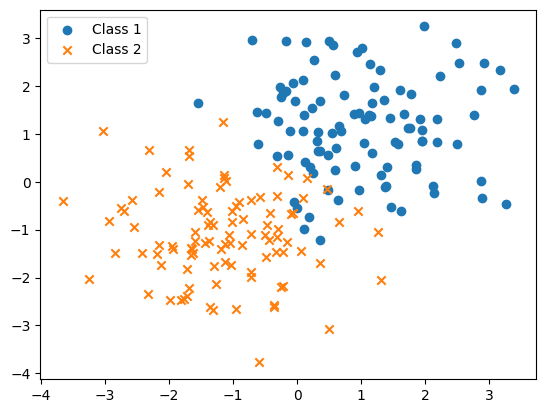

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
mean1 = np.array([1, 1])
mean2 = np.array([-1, -1])
cov = np.eye(2)
X1 = np.random.multivariate_normal(mean1, cov, 100)
X2 = np.random.multivariate_normal(mean2, cov, 100)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], marker='x', label='Class 2')
plt.legend()
plt.show()

In [ ]:
import random
def fitness_function(chromosome):
    return sum(chromosome)
def genetic_algorithm(population_size, chromosome_size, num_generations):
    population = [[random.randint(0, 1) for _ in range(chromosome_size)] for _ in range(population_size)]
    for generation in range(num_generations):
        fitness_values = [fitness_function(chromosome) for chromosome in population]
        best_fitness = max(fitness_values)
        best_chromosome = population[fitness_values.index(best_fitness)]
        print("Generation", generation, ":", best_chromosome, "Fitness:", best_fitness)
        new_population = []
        for _ in range(population_size):
            parent1 = population[roulette_wheel_selection(fitness_values)]
            parent2 = population[roulette_wheel_selection(fitness_values)]
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)
        population = new_population
def roulette_wheel_selection(fitness_values):
    total_fitness = sum(fitness_values)
    random_value = random.uniform(0, total_fitness)
    cumulative_fitness = 0
    for i, fitness in enumerate(fitness_values):
        cumulative_fitness += fitness
        if cumulative_fitness >= random_value:
            return i
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child
def mutate(chromosome):
    mutation_rate = 0.01
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
genetic_algorithm(population_size=100, chromosome_size=10, num_generations=10)

Generation 0 : [1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 9
Generation 1 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 0] Fitness: 9
Generation 2 : [1, 1, 1, 1, 1, 1, 1, 1, 0, 1] Fitness: 9
Generation 3 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 4 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 5 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 6 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 7 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 8 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10
Generation 9 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fitness: 10


In [ ]:
import numpy as np
class City:
    def _init_(self, x, y):
        self.x = x
        self.y = y
    def distance(self, city):
        x_dist = abs(self.x - city.x)
        y_dist = abs(self.y - city.y)
        distance = np.sqrt((x_dist * 2) + (y_dist * 2))
        return distance
    def _repr_(self):
        return f"({self.x}, {self.y})"
class Fitness:
    def _init_(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
    def route_distance(self):
        if self.distance == 0:
            path_distance = 0
            for i in range(len(self.route)):
                from_city = self.route[i]
                to_city = None
                if i + 1 < len(self.route):
                    to_city = self.route[i + 1]
                else:
                    to_city = self.route[0]
                path_distance += from_city.distance(to_city)
            self.distance = path_distance
        return self.distance
    def route_fitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.route_distance())
        return self.fitness
def genetic_algorithm(population, elite_size, mutation_rate, generations):
    pop_size = len(population)
    for i in range(generations):
        fitness_results = []
        for j in range(pop_size):
            fitness_results.append((Fitness(population[j]), j))
        fitness_results.sort(reverse=True, key=lambda x: x[0].route_fitness())
        ranked_population = [population[result[1]] for result in fitness_results]
        elite = ranked_population[:elite_size]
        non_elite = []
        while len(non_elite) < pop_size - elite_size:
            tournament = np.random.choice(ranked_population, 4)
            tournament.sort(reverse=True, key=lambda x: x.route_fitness())
            non_elite.append(tournament[0])
        children = []
        for k in range(len(non_elite)):
            child = crossover(non_elite[k], elite[np.random.randint(0, elite_size)])
            children.append(child)
        for l in range(len(children)):
            mutate(children[l], mutation_rate)
        population = elite + children
        print("Generation {0}: Best Distance = {1}".format(i, ranked_population[0].route_distance()))
    return ranked_population[0]
def crossover(parent1, parent2):
    child = []
    child_p1 = []
    child_p2 = []
    gene1 = int(np.random.random() * len(parent1))
    gene2 = int(np.random.random() * len(parent1))
    start_gene = min(gene1, gene2)
    end_gene = max(gene1, gene2)
    for i in range(start_gene, end_gene):
        child_p1.append(parent1[i])